In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.svm import SVC
from sklearn import svm,tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import joblib as jl

In [2]:
class_names = np.array([
    "Sedex",
    "MVT",
    "VMS",
    "Skarn"
])
path_file = "sphalerite_iqr_initi_knn.xlsx"
data = pd.read_excel(path_file)
# print(data.describe())
df = data.loc[:,['type','Cd','Mn','Ag','Cu','Pb','Sn','Ga','In','Sb','Co','Ge','Fe']]



for col_i in range(1, 13):
    df.iloc[:, col_i] = pd.to_numeric(df.iloc[:, col_i], errors="coerce")
    
    
X = df.copy(deep=True)

In [3]:
# # 对空缺值进行填补
# Sedex = df.loc[df['type']=='Sedex',:] 
# MVT = df.loc[df['type']=='MVT',:]
# VMS = df.loc[df['type']=='VMS',:]
# Skarn = df.loc[df['type']=='Skarn',:]


# KI = KNNImputer(n_neighbors=5,weights='distance')

# Sedex_transform = KI.fit_transform(Sedex.iloc[:,1:])
# Sedex_transform = pd.DataFrame(Sedex_transform,index=Sedex.type,columns=Sedex.columns[1:])

# MVT_transform = KI.fit_transform(MVT.iloc[:,1:])
# MVT_transform = pd.DataFrame(MVT_transform,index=MVT.type,columns=MVT.columns[1:])

# VMS_transform = KI.fit_transform(VMS.iloc[:,1:])
# VMS_transform = pd.DataFrame(VMS_transform,index=VMS.type,columns=VMS.columns[1:])

# Skarn_transform = KI.fit_transform(Skarn.iloc[:,1:])
# Skarn_transform = pd.DataFrame(Skarn_transform,index=Skarn.type,columns=Skarn.columns[1:])

# feature = pd.concat([Sedex_transform,MVT_transform,VMS_transform,Skarn_transform], axis=0)

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(feature)
# # 将标准化后的数据重新转换为 DataFrame
# scaled_feature = pd.DataFrame(scaled_data, columns=feature.columns)
# # # feature.describe()
# scaled_feature.to_excel('sphalerite_iqr_initi_standard.xlsx')

In [3]:
y_label = X.pop('type') 

In [4]:
  #取出qtype那一列，然后赋值给y,pop方法返回从列表中移除的元素对象
print(y_label.value_counts())  # number of samples in each class
y_int, index = pd.factorize(y_label, sort=True) #sort=True是将Index按照大小写排列，再将Index对应的值返回到arry

# (array([2, 0, 4, 1, 5, 3], dtype=int64),
#  Index(['bule', 'bule_', 'green', 'pure', 'red', 'yellow'], dtype='object'))
# (array([0, 1, 2, 3, 4, 5], dtype=int64),
#  Index(['green', 'bule', 'red', 'bule_', 'yellow', 'pure'], dtype='object'))
y = y_int
print(index)

print(y_int)
print(len(X))  # number， of samples
# print(y.value_counts()) # number of samples in each class
for label,code in zip(y_label,y):
    print(f"Label: {label}, Code: {code}")

MVT      1424
Sedex    1181
VMS       595
Skarn     500
Name: type, dtype: int64
Index(['MVT', 'Sedex', 'Skarn', 'VMS'], dtype='object')
[1 1 1 ... 2 2 2]
3700
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Label: Sedex, Code: 1
Labe

Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0


Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0
Label: MVT, Code: 0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify = y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2960, 12) (740, 12) (2960,) (740,)


In [11]:

from sklearn.pipeline import make_pipeline
log_transformer = FunctionTransformer(np.log, validate=True)
pipe_clf = make_pipeline(log_transformer, StandardScaler(), SVC(kernel='rbf',C=1.0,gamma=0.25,cache_size=1000, class_weight=None, probability=True))
pipe_clf

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<ufunc 'log'>, validate=True)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(cache_size=1000, gamma=0.25, probability=True))])

In [ ]:
# C = 1
# models = (
#           svm.SVC(kernel='linear', C=C, class_weight=None),
# #           svm.LinearSVC(C=C)
# #           KNeighborsClassifier(),
#           RandomForestClassifier(max_depth=7, n_estimators=5),
# #           svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, class_weight='balanced'),
#           svm.SVC(kernel='rbf'), #, class_weight='balanced'),
# #           MLPClassifier(alpha=1),#16, max_iter=2000
#           DecisionTreeClassifier(max_depth=7)   
#          )
# for clf in models:
#     scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro', n_jobs=-1)
#     print(f'{scores.mean():2.2f}' + '±' + f'{scores.std():2.2f}')

In [8]:
param_grid ={
    "kernel": ["rbf"],
    "C":[1.0],
    "gamma":[0.25]
}


In [9]:
# C_range = np.logspace(-2,9,12,base=2)
# gamma_range = np.logspace(-5,4,12,base=2)
# C_range = np.logspace(-5,8,14,base=2)
# gamma_range = np.logspace(-10,3,14,base=2) #指定开始值，结束值 ，元素个数，对数底数示例


grid = GridSearchCV(
    pipe_clf,param_grid=param_grid,cv=10,scoring="f1_macro", n_jobs=-1, refit=True
)





In [12]:
pipe_clf.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<ufunc 'log'>, validate=True)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(cache_size=1000, gamma=0.25, probability=True))])

In [14]:
y_test_pred = pipe_clf.predict(X_test)
y_train_pred = pipe_clf.predict(X_train)
print('训练集准确率:%.3f' % pipe_clf.score(X_train, y_train))
print('测试集准确率:%.3f' % pipe_clf.score(X_test, y_test))

训练集准确率:0.995
测试集准确率:0.980


In [15]:


jl.dump(pipe_clf, 'Sphalerite Classifier_svm1.pkl')

['Sphalerite Classifier_svm1.pkl']

In [16]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

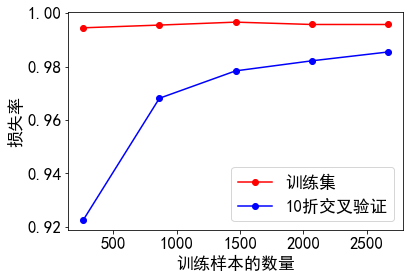

In [23]:
%matplotlib inline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipe_clf, X_train, y_train,cv=10,n_jobs=-1,
    train_sizes=np.linspace(0.1,1,5), scoring="f1_macro"
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis =1)
plt.rc('font',family='simhei',size=17)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',label='训练集')
plt.plot(train_sizes, test_scores_mean, 'o-', color='b',label='10折交叉验证')
plt.xlabel("训练样本的数量")
plt.ylabel("准确率")
plt.legend(loc="best")
plt.show()

In [10]:
# scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))
# plt.figure(figsize=(3.75,3.75))
# plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=1)
# plt.imshow(
#     scores,
#     interpolation="nearest",
#     cmap=plt.cm.cividis,
#     norm=MidpointNormalize(vmin=0.2, midpoint=0.8),
# )
# plt.xlabel("gamma")
# plt.ylabel("C")
# plt.colorbar()
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# plt.yticks(np.arange(len(C_range)), C_range)
# plt.title("F1得分")
# plt.show()

In [11]:
y_test_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)

print('训练集准确率:%.3f' % grid.score(X_train, y_train))
print('测试集准确率:%.3f' % grid.score(X_test, y_test))

训练集准确率:0.995
测试集准确率:0.985


In [12]:
# test_indices = X_test1.index
# df_t_f = pd.DataFrame(index = test_indices)
# df_t_f['Cd'] = X_test1['Cd']
# df_t_f['True_Label'] = y_test
# pred_series = pd.Series(y_test_pred, index=test_indices)
# # 将预测标签列添加到表格中
# df_t_f['Predicted_Label'] = pred_series



In [13]:
# df_t_f.to_excel("df_t_f_SVM.xlsx")

In [17]:
# print(classification_report(y_train,y_train_pred,output_dict=False))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       1.00      0.96      0.98       236
           2       0.99      0.97      0.98       100
           3       0.98      0.99      0.98       119

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



SVM的混淆矩阵
[[284   1   0   0]
 [ 10 226   0   0]
 [  0   0  97   3]
 [  0   0   1 118]]
SVM
[[1.   0.   0.   0.  ]
 [0.04 0.96 0.   0.  ]
 [0.   0.   0.97 0.03]
 [0.   0.   0.01 0.99]]


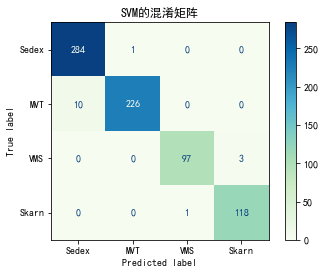

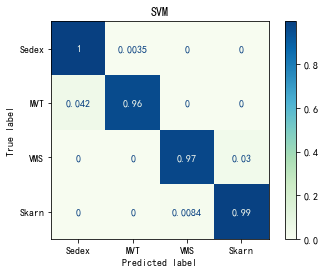

In [18]:
titles_options = [
    ("SVM的混淆矩阵", None),
    ("SVM", "true"),
]
np.set_printoptions(precision=2)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        pipe_clf,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.GnBu,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.rc('font',family='simhei',size=17)
plt.show()


In [15]:
report = classification_report(y_test, y_test_pred, output_dict=True)
catch = {}
for key, val in report.items():
    if key != 'accuracy':
        catch[key] = {}
        for subkey, subval in val.items():
            catch[key][subkey] = []
    else:
        catch[key] = []

for i in range(50):
    # 划分数据集
    X_train1, X_test1, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=i)
    
    X_train10 = Log_Std(X_train1)
    X_test10 = Log_Std(X_test1)

    X_train = X_train10
    X_test = X_test10
    # 创建SVM分类模型
    
    # 训练模型
    grid.fit(X_train, y_train)
    
    # 预测测试集
    temreport = classification_report(y_test, grid.predict(X_test), output_dict=True)
    
    # 生成分类报告
    for key, val in temreport.items():
        if key != 'accuracy':
            for subkey, subval in val.items():
                catch[key][subkey].append(temreport[key][subkey])
        else:
            catch[key].append(temreport[key])

for key, val in catch.items():
    if key != 'accuracy':
        for subkey, subval in val.items():
            tem = catch[key][subkey]
            catch[key][subkey] = f'{np.mean(tem):2.3f}' + '±' + f'{np.std(tem):2.3f}'
    else:
        tem = catch[key]
        catch[key] = f'{np.mean(tem):2.3f}' + '±' + f'{np.std(tem):2.3f}'

for key, val in catch.items():
    if key != 'accuracy':
        temdf = pd.json_normalize(catch[key])
        try:
            i = int(key)
            print(index[i],'\n', temdf)
        except:
            print(key,'\n', temdf)
    else:
        print(key,'\n', val)

0 
      precision       recall     f1-score         support
0  0.980±0.007  0.992±0.005  0.986±0.004  284.440±10.850
1 
      precision       recall     f1-score         support
0  0.991±0.006  0.976±0.008  0.984±0.005  236.060±12.174
2 
      precision       recall     f1-score        support
0  0.990±0.011  0.986±0.012  0.988±0.007  100.700±8.420
3 
      precision       recall     f1-score        support
0  0.987±0.011  0.990±0.009  0.989±0.006  118.800±8.476
accuracy 
 0.986±0.004
macro avg 
      precision       recall     f1-score        support
0  0.987±0.004  0.986±0.004  0.987±0.004  740.000±0.000
weighted avg 
      precision       recall     f1-score        support
0  0.986±0.004  0.986±0.004  0.986±0.004  740.000±0.000
